In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 160)

In [2]:
description= pd.read_csv('src\columns_description - columns_description.csv')
description.head(20)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [3]:
app_df = pd.read_csv(r"src\application_data.csv")
pre_df = pd.read_csv(r"src\previous_application.csv")

In [4]:
app_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
pre_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [6]:
print(f"Shape of application data : {app_df.shape}")
print(f"Shape of previous application data : {pre_df.shape}")

Shape of application data : (307511, 122)
Shape of previous application data : (1670214, 37)


In [7]:
print('Columns Present in application data : \n\n', app_df.columns.tolist())

print('\n\nColumns Present in previous application data : \n\n', pre_df.columns)

Columns Present in application data : 

 ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 

In [8]:
print('Application Data')

app_df.info(max_cols=app_df.shape[1])

Application Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [9]:
print('Previous Application Data')

pre_df.info(max_cols=pre_df.shape[1])

Previous Application Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMEN

In [10]:
def missing_values(df):

    data =[(col, df[col].isna().sum(), round((df[col].isna().sum()/df.shape[0])*100, 3)) for col in df.columns]
    return pd.DataFrame(data, columns=['Column_Name', 'Missing_Values', 'Precentage'])



In [11]:
print('Missing values count for Application DataFrame')
missing_values(app_df).head(50)

Missing values count for Application DataFrame


,Column_Name,Missing_Values,Precentage
0,SK_ID_CURR,0,0.000
1,TARGET,0,0.000
2,NAME_CONTRACT_TYPE,0,0.000
3,CODE_GENDER,0,0.000
4,FLAG_OWN_CAR,0,0.000
5,FLAG_OWN_REALTY,0,0.000
6,CNT_CHILDREN,0,0.000
7,AMT_INCOME_TOTAL,0,0.000
8,AMT_CREDIT,0,0.000
9,AMT_ANNUITY,12,0.004


In [12]:
print('Missing values count for Previous Application DataFrame')
missing_values(pre_df)

Missing values count for Previous Application DataFrame


,Column_Name,Missing_Values,Precentage
0,SK_ID_PREV,0,0.000
1,SK_ID_CURR,0,0.000
2,NAME_CONTRACT_TYPE,0,0.000
3,AMT_ANNUITY,372235,22.287
4,AMT_APPLICATION,0,0.000
5,AMT_CREDIT,1,0.000
6,AMT_DOWN_PAYMENT,895844,53.636
7,AMT_GOODS_PRICE,385515,23.082
8,WEEKDAY_APPR_PROCESS_START,0,0.000
9,HOUR_APPR_PROCESS_START,0,0.000


In [13]:
# Converting Column Name Upper Case into Lower Case 

app_df.columns = [col.lower() for col in app_df.columns]
pre_df.columns = [col.lower() for col in pre_df.columns]
pre_df.columns

Index(['sk_id_prev', 'sk_id_curr', 'name_contract_type', 'amt_annuity',
       'amt_application', 'amt_credit', 'amt_down_payment', 'amt_goods_price',
       'weekday_appr_process_start', 'hour_appr_process_start',
       'flag_last_appl_per_contract', 'nflag_last_appl_in_day',
       'rate_down_payment', 'rate_interest_primary',
       'rate_interest_privileged', 'name_cash_loan_purpose',
       'name_contract_status', 'days_decision', 'name_payment_type',
       'code_reject_reason', 'name_type_suite', 'name_client_type',
       'name_goods_category', 'name_portfolio', 'name_product_type',
       'channel_type', 'sellerplace_area', 'name_seller_industry',
       'cnt_payment', 'name_yield_group', 'product_combination',
       'days_first_drawing', 'days_first_due', 'days_last_due_1st_version',
       'days_last_due', 'days_termination', 'nflag_insured_on_approval'],
      dtype='object')

### Removing columns with missing values more than 50% 

In [14]:
print('Missing values count for Previous Application DataFrame')
pre_isna = missing_values(pre_df)

pre_isna

Missing values count for Previous Application DataFrame


,Column_Name,Missing_Values,Precentage
0,sk_id_prev,0,0.000
1,sk_id_curr,0,0.000
2,name_contract_type,0,0.000
3,amt_annuity,372235,22.287
4,amt_application,0,0.000
5,amt_credit,1,0.000
6,amt_down_payment,895844,53.636
7,amt_goods_price,385515,23.082
8,weekday_appr_process_start,0,0.000
9,hour_appr_process_start,0,0.000


In [15]:
pre_isna[pre_isna['Precentage'] >= 50 ]

,Column_Name,Missing_Values,Precentage
6,amt_down_payment,895844,53.636
12,rate_down_payment,895844,53.636
13,rate_interest_primary,1664263,99.644
14,rate_interest_privileged,1664263,99.644


In [16]:
col_name = pre_isna[pre_isna['Precentage'] >= 50 ]['Column_Name']

# Removing columns with missing values more than 50% In Previous Application Data

pre_df.drop(columns=col_name, axis =1, inplace = True)

pre_df.shape


(1670214, 33)

In [17]:
print('Missing values count for Application DataFrame')
app_isna = missing_values(app_df)

app_isna

Missing values count for Application DataFrame


,Column_Name,Missing_Values,Precentage
0,sk_id_curr,0,0.000
1,target,0,0.000
2,name_contract_type,0,0.000
3,code_gender,0,0.000
4,flag_own_car,0,0.000
...,...,...,...
117,amt_req_credit_bureau_day,41519,13.502
118,amt_req_credit_bureau_week,41519,13.502
119,amt_req_credit_bureau_mon,41519,13.502
120,amt_req_credit_bureau_qrt,41519,13.502


In [18]:
app_isna[app_isna['Precentage'] >= 50 ]

,Column_Name,Missing_Values,Precentage
21,own_car_age,202929,65.991
41,ext_source_1,173378,56.381
44,apartments_avg,156061,50.750
45,basementarea_avg,179943,58.516
47,years_build_avg,204488,66.498
48,commonarea_avg,214865,69.872
49,elevators_avg,163891,53.296
50,entrances_avg,154828,50.349
52,floorsmin_avg,208642,67.849
53,landarea_avg,182590,59.377


In [19]:
col_name = app_isna[app_isna['Precentage'] >= 50 ]['Column_Name']
print('Shape of the application DataFrame before drop the columns: ', app_df.shape, '\nNumber of columns to be Remove :', len(col_name))

# Removing columns with missing values more than 50% In Previous Application Data

app_df.drop(columns=col_name, axis =1, inplace = True)

print('Shape of the application DataFrame: ', app_df.shape)


Shape of the application DataFrame before drop the columns:  (307511, 122) 
Number of columns to be Remove : 41
Shape of the application DataFrame:  (307511, 81)


### Combining 'flag' Columns and Checking Correlation with the Target Variable

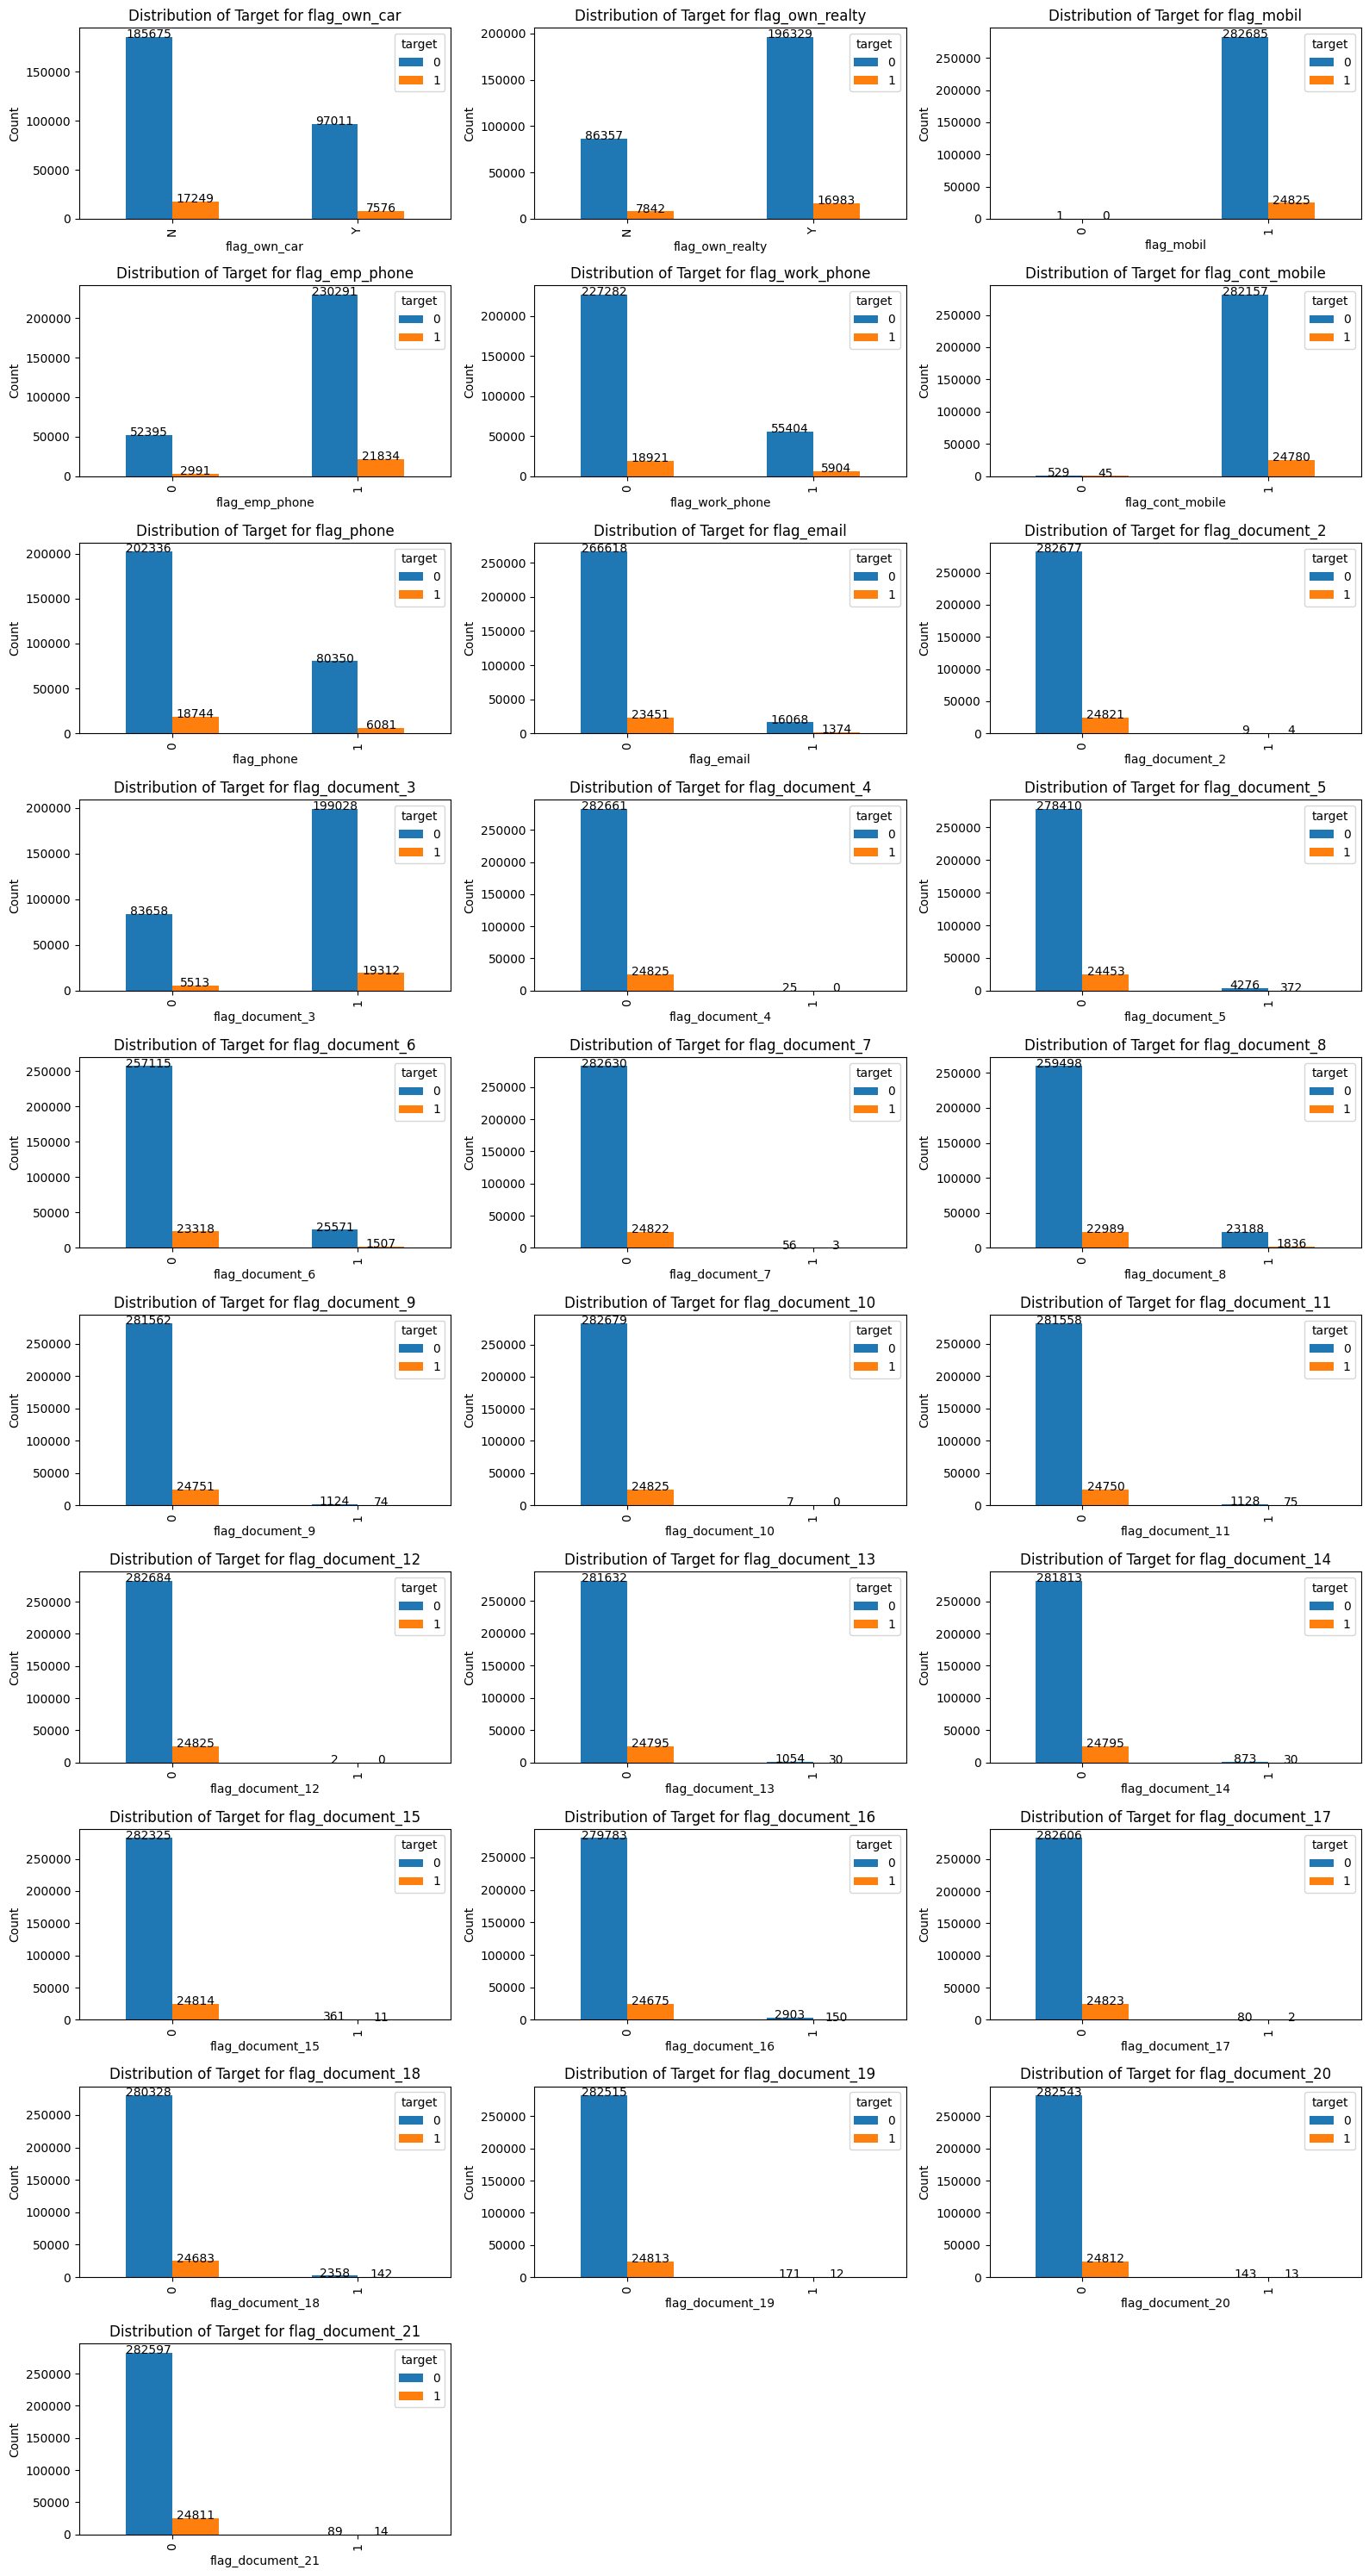

In [58]:
flag_columns = [col for col in app_df.columns if 'flag' in col]


plt.figure(figsize=(16, 30))

# Plot each 'flag' column against the target
for i, flag in enumerate(flag_columns):
    # print(i)
    plt.subplot(10, 3, i + 1)
    a = app_df.groupby([flag, 'target']).size().unstack(fill_value=0)
    a.plot(kind='bar', stacked=False, ax=plt.gca())
    plt.title(f'Distribution of Target for {flag}')
    plt.xlabel(flag)
    plt.ylabel('Count')
    
    # Annotate the bars with the count values
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 2), textcoords='offset points')

plt.tight_layout()
plt.show()


In [68]:
# Converting Categorical values into Numerical values

for col in flag_columns:
    if app_df[col].dtype =='object':
        
        app_df[col] = app_df[col].apply(lambda x: 1 if x=='Y' else 0)

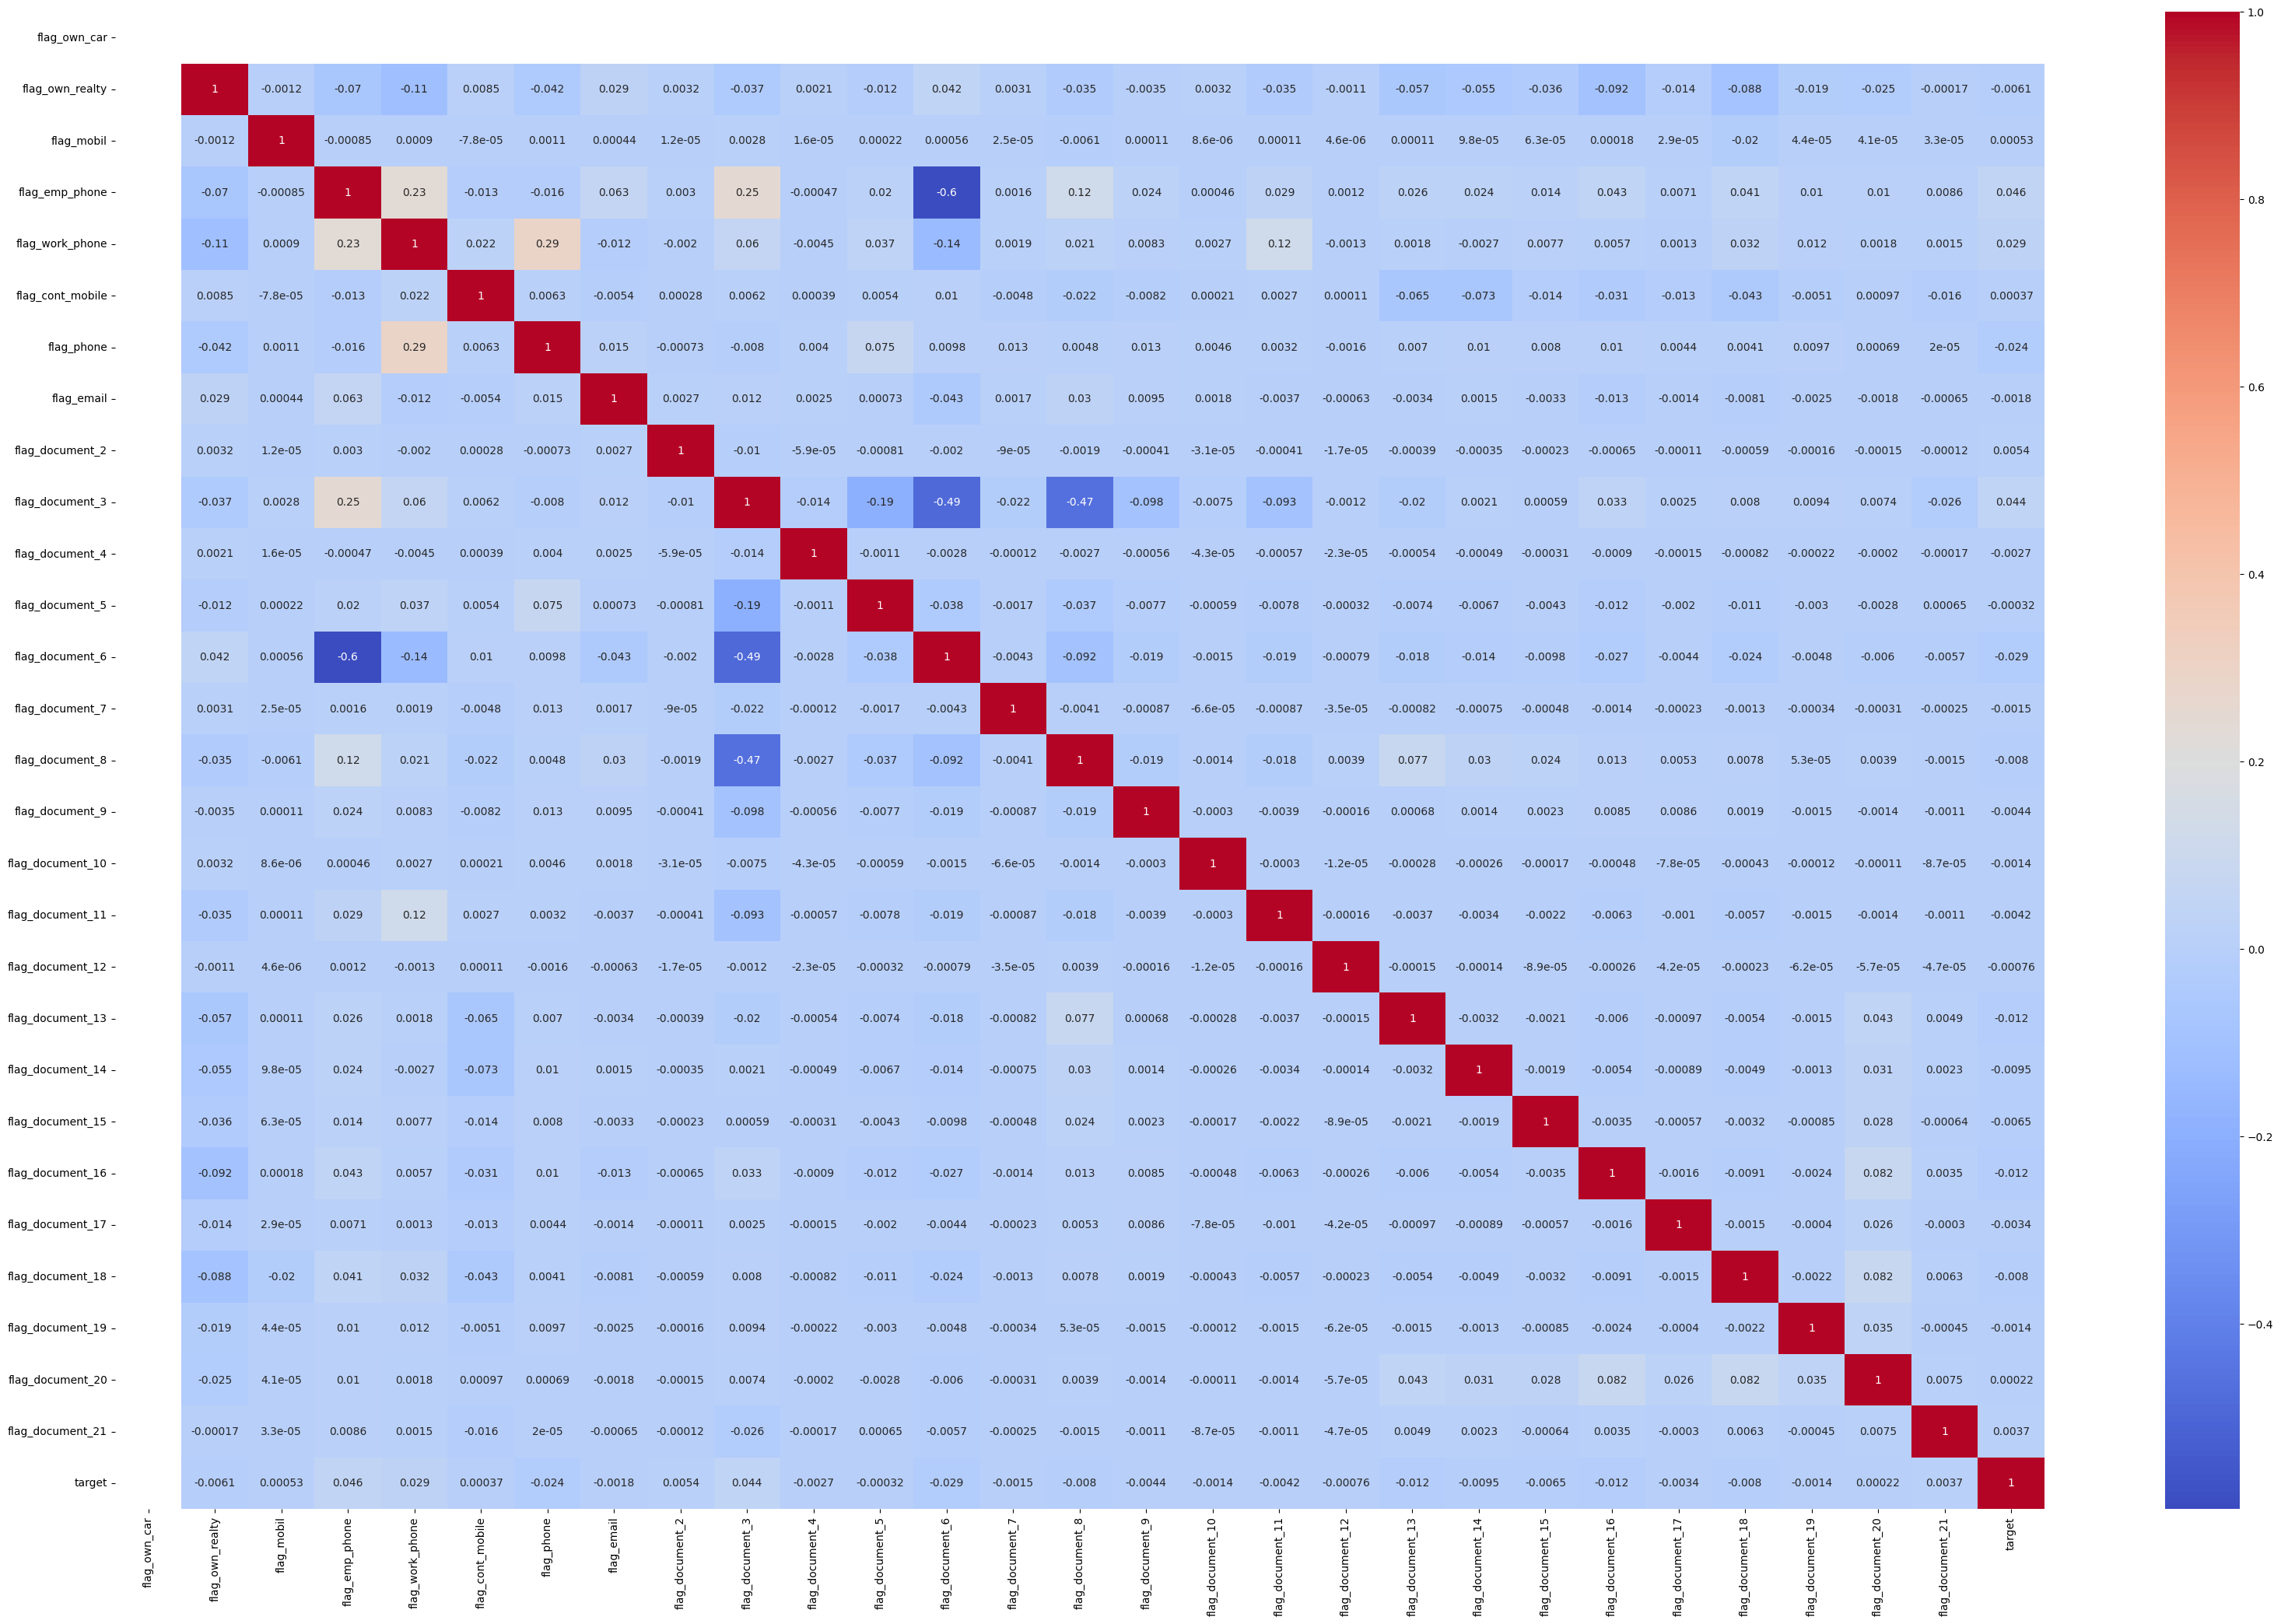

In [70]:
flag_column = [col for col in app_df.columns if 'flag' in col]
flag_column.append('target')

plt.figure(figsize=(40, 25))

sns.heatmap(data = app_df[flag_column].corr(), annot=True, cmap = 'coolwarm')

plt.show()

In [72]:
# mobile, email and phone  flags columns are not affect the target column. We have to Remove the Columns

app_df.drop(columns=['flag_own_realty', 'flag_mobil', 'flag_emp_phone', 'flag_work_phone', 'flag_cont_mobile', 'flag_phone', 'flag_email'],
             axis =1, inplace = True)

In [73]:
flag_column = [col for col in app_df.columns if 'flag' in col]
len(flag_column)

21

In [75]:
# Create a new column that is the sum of all 'flag' columns
app_df['flag_sum'] = app_df[flag_column].sum(axis=1)

In [77]:
app_df.flag_sum.value_counts()

flag_sum
1    270056
0     29549
2      7742
3       163
4         1
Name: count, dtype: int64

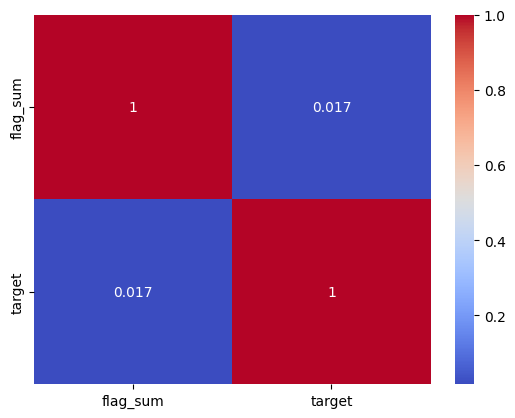

In [76]:
correlation = app_df[['flag_sum', 'target']].corr()


# Plot the correlation heatmap for verification
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')
plt.show()

In [86]:
flag_column = [col for col in app_df.columns if 'flag_document' in col]

print('Shape of the application DataFrame before drop the Individual Flag columns: ', app_df.shape, '\nNumber of columns to be Remove :', len(flag_column))

# Removing the Individual Flag columns

app_df.drop(columns=flag_column, axis =1, inplace = True)

print('Shape of the application DataFrame: ', app_df.shape)


Shape of the application DataFrame before drop the Individual Flag columns:  (307511, 75) 
Number of columns to be Remove : 20
Shape of the application DataFrame:  (307511, 55)


### Findings: Combining 'flag' Columns and Checking Correlation with the Target Variable

#### Individual Correlation Analysis

1. **Low Individual Correlation**:
   - Each 'flag' column was correlated with the target variable individually.
   - The correlation coefficients between the individual 'flag' columns and the target were very low (approximately 0.0023).
   - This indicates that no single 'flag' column has a strong relationship with the target variable on its own.

2. **Correlation Matrix**:
   - A heatmap of the correlation matrix showed minimal correlation between each 'flag' column and the target.
   - This further confirmed that the individual 'flag' columns do not significantly impact the target variable when considered separately.

#### Combined Feature Approach

1. **Summing 'flag' Columns**:
   - To capture the collective effect of all 'flag' columns, a new column `flag_sum` was created by summing the values of all 'flag' columns for each row.
   - This new feature aimed to represent the combined presence of all flags.

2. **Correlation of Combined Feature**:
   - The correlation between the `flag_sum` column and the target variable was computed.
   - The resulting correlation coefficient was found to be similar to the individual correlations (around 0.017).
   - This indicates that even the combined feature does not show a strong relationship with the target variable.

### Conclusion

- The individual 'flag' columns, as well as the combined `flag_sum` column, have very low correlation with the target variable.
- This suggests that the 'flag' columns, whether considered individually or collectively, do not have a significant impact on the target variable in this dataset.



### Findings Summary

- **Low Correlation**: Both individual 'flag' columns and the combined `flag_sum` column exhibit very low correlation with the target variable.
- **No Significant Impact**: The analysis indicates that the 'flag' columns do not have a significant impact on the target variable, either individually or collectively.